In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image

from keras import models,layers
from keras import optimizers
import keras 

from keras.datasets import mnist
from keras.utils import np_utils


Using TensorFlow backend.


In [2]:
#data processing 

data=mnist.load_data()
(x_train,y_train),(x_test,y_test)=data

x_train=x_train.astype('float32')/255     #normalization
x_test=x_test.astype('float32')/255        #normalization
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

y_train=np_utils.to_categorical(y_train,10)     #one hot encoding
y_test=np_utils.to_categorical(y_test,10)

11493376/11490434 [==============================] - 2s 0us/step


In [3]:
#LeNet5 Model Designing

In = layers.Input((28,28,1))
##  layer 1
X = layers.Conv2D(6,kernel_size=(5,5),strides=(1,1), activation='tanh',padding='same')(In)
##  layer 2
X = layers.AveragePooling2D(pool_size=(2,2),strides=(1,1),padding='valid')(X)
##  layer 3 
X = layers.Conv2D(16,kernel_size=(5,5),strides=(1,1), activation='tanh',padding='valid')(X)
##  layeer 4
X = layers.AveragePooling2D(pool_size=(2,2),strides=(2,2),padding='valid')(X)
##  layer 5
X = layers.Conv2D(120,kernel_size=(5,5),strides=(1,1), activation='tanh',padding='valid')(X)

## FC layers
X = layers.Flatten()(X)
X = layers.Dense(86,activation='tanh')(X)
output = layers.Dense(10,activation='softmax')(X)

model = models.Model(inputs=In, outputs=output)
sgd = optimizers.Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])
print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_1 (Average (None, 27, 27, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 16)        2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 120)         48120     
_________________________________________________________________
flatten_1 (Flatten)          (None, 5880)              0   

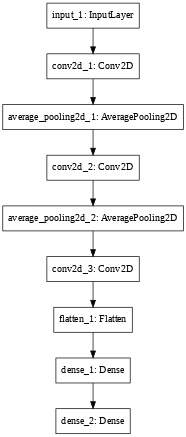

In [4]:
#just for visualization of layers
tf.keras.utils.plot_model(model,to_file="model.png",show_shapes=False,show_layer_names=True,rankdir="TB",expand_nested=False,dpi=50,)

In [5]:
#training LeNet5 on MNIST digit dataset
history = model.fit(x=x_train,y=y_train,batch_size=128,epochs=10,validation_data=(x_test,y_test),verbose=1)      
# print loss and accuracy of test set
score=model.evaluate(x_test,y_test)
print('test loss = ',score[0])
print('test accuracy =',score[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 158us/step - loss: 0.3008 - accuracy: 0.9143 - val_loss: 0.1759 - val_accuracy: 0.9509
Epoch 2/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.1572 - accuracy: 0.9556 - val_loss: 0.1300 - val_accuracy: 0.9622
Epoch 3/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.1089 - accuracy: 0.9689 - val_loss: 0.0882 - val_accuracy: 0.9722
Epoch 4/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.0804 - accuracy: 0.9766 - val_loss: 0.0752 - val_accuracy: 0.9779
Epoch 5/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.0644 - accuracy: 0.9808 - val_loss: 0.0668 - val_accuracy: 0.9794
Epoch 6/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.0532 - accuracy: 0.9841 - val_loss: 0.0607 - val_accuracy: 0.9800
Epoch 7/10
60000/60000 [==============================] - 3s 51us/s

Text(0, 0.5, 'accuracy')

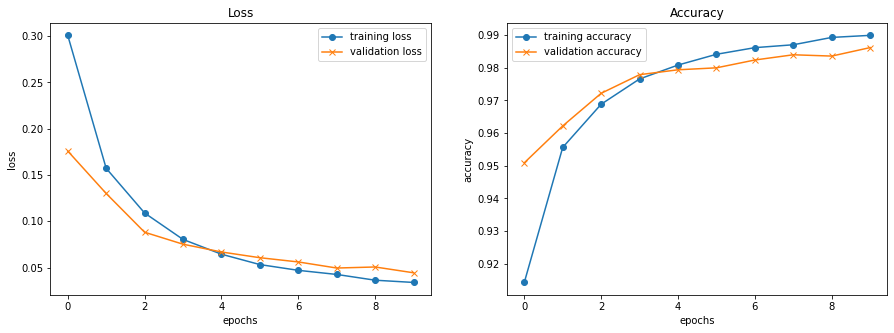

In [6]:
# plot accuracy and loss for MNIST digit dataset
 
fig = plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Loss')
plt.plot(history.history['loss'],'o-',label='training loss')
plt.plot(history.history['val_loss'],'x-',label='validation loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

plt.subplot(1,2,2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'],'o-',label='training accuracy')
plt.plot(history.history['val_accuracy'],'x-',label='validation accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')



In [7]:
#fashion MNIST Dataset download and processing 

from keras.datasets import fashion_mnist

data=fashion_mnist.load_data()
(x_train,y_train),(x_test,y_test)=data

x_train=x_train.astype('float32')/255     #normalization
x_test=x_test.astype('float32')/255        #normalization
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

y_train=np_utils.to_categorical(y_train,10)     #one hot encoding
y_test=np_utils.to_categorical(y_test,10)


4423680/4422102 [==============================] - 2s 0us/step


In [8]:
#model training on original Fashion MNIST dataset
history1 = model.fit(x=x_train,y=y_train,batch_size=512,epochs=10,validation_data=(x_test,y_test),verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 25us/step - loss: 0.9875 - accuracy: 0.6859 - val_loss: 0.6494 - val_accuracy: 0.7703
Epoch 2/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.5688 - accuracy: 0.7965 - val_loss: 0.5645 - val_accuracy: 0.7936
Epoch 3/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.4978 - accuracy: 0.8246 - val_loss: 0.5089 - val_accuracy: 0.8189
Epoch 4/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.4572 - accuracy: 0.8385 - val_loss: 0.4711 - val_accuracy: 0.8324
Epoch 5/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.4298 - accuracy: 0.8492 - val_loss: 0.4384 - val_accuracy: 0.8471
Epoch 6/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.4056 - accuracy: 0.8573 - val_loss: 0.4365 - val_accuracy: 0.8437
Epoch 7/10
60000/60000 [==============================] - 1s 23us/st

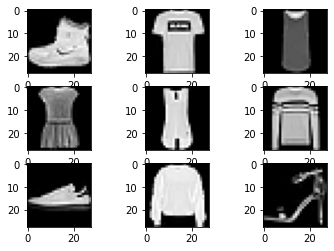

In [9]:
#visualize dataset
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train[i].reshape(28,28), cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

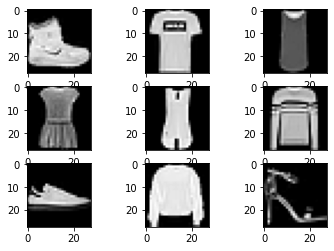

In [10]:
#data augmentation visualization

aug_tmp=x_train[0:10]                     #pick a sample
flipped = tf.image.flip_left_right(aug_tmp)       #horizaontal flip
bright = tf.image.adjust_brightness(aug_tmp, 0.4)      #change brightness
cropped_pad=tf.image.resize_with_crop_or_pad(aug_tmp, 34, 34)     
cropped = tf.image.random_crop(cropped_pad, size=[9, 28, 28, 1])      #random cropping 

for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel dat
	plt.imshow(tf.reshape(flipped[i],(28,28)), cmap=plt.get_cmap('gray'))   #augmented image 
# show the figure
plt.show()

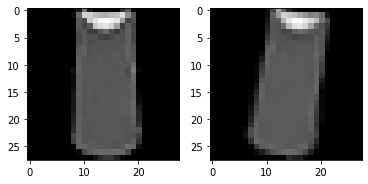

In [11]:
#random rotation of image
image = tf.keras.preprocessing.image.random_rotation(
    aug_tmp[2], 15, row_axis=0, col_axis=1, channel_axis=2, fill_mode='constant', cval=0.0,  #15 degree range
    interpolation_order=1
)
plt.subplot(122)
plt.imshow(tf.reshape(image,(28,28)), cmap=plt.get_cmap('gray'))       #augmented image
plt.subplot(121)
plt.imshow(tf.reshape(aug_tmp[2],(28,28)), cmap=plt.get_cmap('gray'))  #original image

In [12]:
#tensorflow datagenerator  
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=15,
    width_shift_range=0.01,
    height_shift_range=0.01,
    horizontal_flip=True)

datagen.fit(x_train)

#This generator manipulates the dataset such that 
#augmented set becomes very different from original dataset
history2=model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=len(x_train) / 32, epochs=10,validation_data=(x_test,y_test),verbose=1)

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.7113 - accuracy: 0.7452 - val_loss: 1.7506 - val_accuracy: 0.4759
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.5738 - accuracy: 0.7909 - val_loss: 1.5796 - val_accuracy: 0.5446
Epoch 3/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.5322 - accuracy: 0.8064 - val_loss: 1.4753 - val_accuracy: 0.5433
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.5042 - accuracy: 0.8164 - val_loss: 1.6785 - val_accuracy: 0.5472
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.4890 - accuracy: 0.8215 - val_loss: 2.1014 - val_accuracy: 0.5031
Epoch 6/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.4740 - accuracy: 0.8288 - val_loss: 1.9925 - val_accuracy: 0.5301
Epoch 7/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.4597 - accuracy: 0.8321 - val_loss: 1.6318 -

In [13]:
#function for manual data augmentation
def data_gen(x_train):
  flipped = tf.image.flip_left_right(x_train)
  print('flipped')
  x_train=np.append(x_train,flipped,axis=0)  #train,flipped
  cropped_pad=tf.image.resize_with_crop_or_pad(x_train, 34, 34)
  cropped = tf.image.random_crop(cropped_pad, size=[x_train.shape[0], 28, 28, 1]) #cropped
  print('cropped')
  tmp_data=np.append(x_train,cropped,axis=0)       ##train,flip,cropped are stacked together
  aug_data=tmp_data
  rot_data=np.empty(x_train.shape)
  for i in range(x_train.shape[0]):
    #random rotation around +-7.5 degree
    rot_data[i]=tf.keras.preprocessing.image.random_rotation(np.array(x_train[i]), 15, row_axis=0, col_axis=1, channel_axis=2, fill_mode='constant', cval=0.0,interpolation_order=1)
  aug_data=np.append(tmp_data,rot_data,axis=0)    #rotated images are stacked 
  return aug_data

gen_data=data_gen(x_train)        #generated dataset

tmp=np.append(y_train,y_train,axis=0) #1
tmp=np.append(tmp,y_train,axis=0) #2
tmp=np.append(tmp,y_train,axis=0) #3
tmp=np.append(tmp,y_train,axis=0) #4
y_train=np.append(tmp,y_train,axis=0)  #generated training labels according to features

flipped
cropped


In [14]:
#model training on manualy augmented dataset 
history3 = model.fit(x=gen_data,y=y_train,batch_size=512,epochs=10,validation_data=(x_test,y_test),verbose=1)

Train on 360000 samples, validate on 10000 samples
Epoch 1/10
360000/360000 [==============================] - 8s 23us/step - loss: 0.5727 - accuracy: 0.7987 - val_loss: 0.4214 - val_accuracy: 0.8506
Epoch 2/10
360000/360000 [==============================] - 8s 23us/step - loss: 0.4369 - accuracy: 0.8428 - val_loss: 0.3879 - val_accuracy: 0.8587
Epoch 3/10
360000/360000 [==============================] - 8s 23us/step - loss: 0.4001 - accuracy: 0.8557 - val_loss: 0.3778 - val_accuracy: 0.8639
Epoch 4/10
360000/360000 [==============================] - 8s 23us/step - loss: 0.3779 - accuracy: 0.8631 - val_loss: 0.3619 - val_accuracy: 0.8715
Epoch 5/10
360000/360000 [==============================] - 8s 23us/step - loss: 0.3604 - accuracy: 0.8700 - val_loss: 0.3592 - val_accuracy: 0.8723
Epoch 6/10
360000/360000 [==============================] - 8s 23us/step - loss: 0.3454 - accuracy: 0.8750 - val_loss: 0.3485 - val_accuracy: 0.8765
Epoch 7/10
360000/360000 [=============================

Text(0, 0.5, 'accuracy')

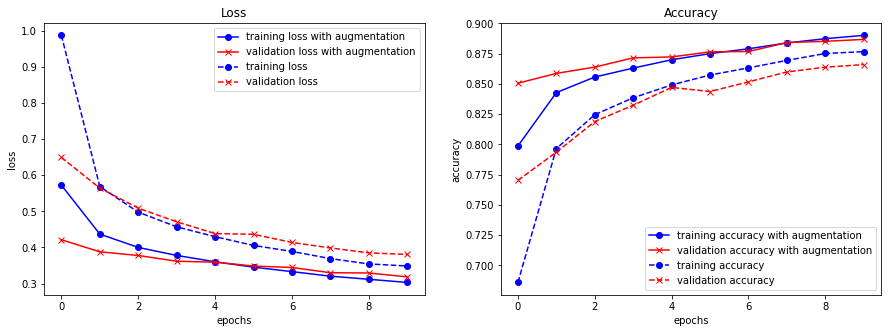

In [15]:
#comparison of augmented data with original data
fig = plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Loss')
plt.plot(history3.history['loss'],'o-b',label='training loss with augmentation')
plt.plot(history3.history['val_loss'],'x-r',label='validation loss with augmentation')
plt.plot(history1.history['loss'],'o--b',label='training loss')
plt.plot(history1.history['val_loss'],'x--r',label='validation loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

plt.subplot(1,2,2)
plt.title('Accuracy')
plt.plot(history3.history['accuracy'],'o-b',label='training accuracy with augmentation')
plt.plot(history3.history['val_accuracy'],'x-r',label='validation accuracy with augmentation')
plt.plot(history1.history['accuracy'],'o--b',label='training accuracy')
plt.plot(history1.history['val_accuracy'],'x--r',label='validation accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
